# Final Project -- Bank Marketing

This is the revision from the first version -- revision was based on the knowledge I gained during the final project, the exploratory data analysis and also from the valuable feedback I received from the lecturers/judges in my final presentation. Revisions included the data preparation and modelling.

In [2]:
# importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [3]:
bank = pd.read_csv('bank-additional-full.csv', delimiter = ';')

## Context
Portuguese Bank Marketing Data Set obtained from University of California, Irvine (UCI) Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was collected from a direct marketing campaign conducted by Portuguese banking institution to offer term deposits. The data collection was made by phone calls to potential customer from May 2008 to November 2010. 

<b>bank client data:</b><br>
* 1 - age (numeric)<br>
* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
* 5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
* 6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
* 7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>

<b>related with the last contact of the current campaign:</b><br>
* 8 - contact: contact communication type (categorical: "cellular","telephone")<br>
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
* 10 - dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

<b>other attributes:</b><br>
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>

<b>social and economic context attributes</b><br>
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
* 20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

<b>Output variable (desired target):</b><br>
* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Dataset preparation

Based on the knowledge I gained during EDA and testing, there are several things that needed to be done. 
* Omitting variable in a feature with very small observations (e.g 'unknown' in marital, 'illiterate' in education, 'yes' in default)
* Making some of the features in ordinal data type (e.g education, poutcome)
* Dropping several features (e.g duration, previous, etc) based on several reasons (e.g correlation)

In [8]:
# making copy of original
bank1 = bank.copy()

In [9]:
# job

bank1['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [10]:
## we will drop unknown
bank1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
marital_unknown = bank1[bank1['marital'] == 'unknown'].index

In [20]:
bank1.drop(marital_unknown, inplace = True)

In [21]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 41187
Data columns (total 21 columns):
age               41108 non-null int64
job               41108 non-null object
marital           41108 non-null object
education         41108 non-null object
default           41108 non-null object
housing           41108 non-null object
loan              41108 non-null object
contact           41108 non-null object
month             41108 non-null object
day_of_week       41108 non-null object
duration          41108 non-null int64
campaign          41108 non-null int64
pdays             41108 non-null int64
previous          41108 non-null int64
poutcome          41108 non-null object
emp.var.rate      41108 non-null float64
cons.price.idx    41108 non-null float64
cons.conf.idx     41108 non-null float64
euribor3m         41108 non-null float64
nr.employed       41108 non-null float64
y                 41108 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [19]:
#drop illiterate and then make it ordinal
bank1['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [22]:
# but before that, I want to drop the observations with illiterate

ill_ind = bank1[bank1['education'] == 'illiterate'].index

In [23]:
bank1.drop(ill_ind, inplace = True)

In [24]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41090 entries, 0 to 41187
Data columns (total 21 columns):
age               41090 non-null int64
job               41090 non-null object
marital           41090 non-null object
education         41090 non-null object
default           41090 non-null object
housing           41090 non-null object
loan              41090 non-null object
contact           41090 non-null object
month             41090 non-null object
day_of_week       41090 non-null object
duration          41090 non-null int64
campaign          41090 non-null int64
pdays             41090 non-null int64
previous          41090 non-null int64
poutcome          41090 non-null object
emp.var.rate      41090 non-null float64
cons.price.idx    41090 non-null float64
cons.conf.idx     41090 non-null float64
euribor3m         41090 non-null float64
nr.employed       41090 non-null float64
y                 41090 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

> Education value : ordinal 
* 0 : basic.4y
* 1 : basic.6y
* 2 : basic.9y
* 3 : high.school, professional.course
* 4 : university.degree, unknown

In [26]:
edu = []

for i in bank1['education']:
    if i == 'basic.4y':
        edu.append(0)
    elif i == 'basic.6y':
        edu.append(1)
    elif i == 'basic.9y':
        edu.append(2)
    elif (i == 'high.school') or (i == 'professional.course'):
        edu.append(3)
    else:
        edu.append(4)

In [27]:
bank1['education'] = edu

In [28]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,3,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,3,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,1,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,3,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
bank1['default'].value_counts()

no         32508
unknown     8579
yes            3
Name: default, dtype: int64

In [30]:
## dropping yes and making it ordinal -- unknown = 0 and no = 1

yes_def = bank1[bank1['default'] == 'yes'].index

In [31]:
bank1.drop(yes_def, inplace = True)

In [32]:
bank1['default'] = bank1['default'].apply(lambda x: 1 if x == 'no' else 0)

In [33]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0,1,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,3,0,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,3,1,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,1,1,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,3,1,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
bank1['housing'].value_counts()

yes        21530
no         18568
unknown      989
Name: housing, dtype: int64

In [35]:
bank1['loan'].value_counts()

no         33865
yes         6233
unknown      989
Name: loan, dtype: int64

In [36]:
bank1.drop(['duration', 'pdays'], axis = 1, inplace = True)

In [37]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0,1,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,3,0,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,3,1,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,1,1,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,3,1,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
target = bank1['y']

In [40]:
bank1.drop('y', axis = 1, inplace = True)

In [41]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,0,1,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,3,0,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,3,1,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,1,1,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,3,1,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [42]:
bank1['poutcome'].value_counts()

nonexistent    35483
failure         4237
success         1367
Name: poutcome, dtype: int64

In [43]:
## encoding poutcome into ordinal -- 0: nonexistent, 1: failure, 2: success

outcome = []

for i in bank1['poutcome']:
    if i == 'nonexistent':
        outcome.append(0)
    elif i == 'failure':
        outcome.append(1)
    else:
        outcome.append(2)

In [44]:
outcome

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [45]:
bank1['poutcome'] = outcome

In [46]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,0,1,no,no,telephone,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,3,0,no,no,telephone,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,3,1,yes,no,telephone,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,1,1,no,no,telephone,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,3,1,no,yes,telephone,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0


In [47]:
bank1.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace = True)

In [48]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 16 columns):
age               41087 non-null int64
job               41087 non-null object
marital           41087 non-null object
education         41087 non-null int64
default           41087 non-null int64
housing           41087 non-null object
loan              41087 non-null object
contact           41087 non-null object
month             41087 non-null object
day_of_week       41087 non-null object
campaign          41087 non-null int64
previous          41087 non-null int64
poutcome          41087 non-null int64
cons.price.idx    41087 non-null float64
cons.conf.idx     41087 non-null float64
euribor3m         41087 non-null float64
dtypes: float64(3), int64(6), object(7)
memory usage: 5.3+ MB


In [49]:
bank_dum = pd.get_dummies(bank1, drop_first = True)

In [51]:
bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 40 columns):
age                  41087 non-null int64
education            41087 non-null int64
default              41087 non-null int64
campaign             41087 non-null int64
previous             41087 non-null int64
poutcome             41087 non-null int64
cons.price.idx       41087 non-null float64
cons.conf.idx        41087 non-null float64
euribor3m            41087 non-null float64
job_blue-collar      41087 non-null uint8
job_entrepreneur     41087 non-null uint8
job_housemaid        41087 non-null uint8
job_management       41087 non-null uint8
job_retired          41087 non-null uint8
job_self-employed    41087 non-null uint8
job_services         41087 non-null uint8
job_student          41087 non-null uint8
job_technician       41087 non-null uint8
job_unemployed       41087 non-null uint8
job_unknown          41087 non-null uint8
marital_married      41087 non-null uint8
mar

### Looking into correlation
credit to: Shaked Zychlinski (https://github.com/shakedzy)

In [64]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError(
            'cannot handle data conversion of type: {} to {}'.format(
                type(data), to))
    else:
        return converted


def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


def replace_nan_with_value(x, y, value):
    x = [v if v == v and v is not None else value for v in x]  # NaN != NaN
    y = [v if v == v and v is not None else value for v in y]
    return x, y

In [61]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# from ._private import (
#     convert, remove_incomplete_samples, replace_nan_with_value
# )

__all__ = [
    'associations',
    'cluster_correlations',
    'conditional_entropy',
    'correlation_ratio',
    'cramers_v',
    'identify_nominal_columns',
    'numerical_encoding',
    'theils_u'
]

_REPLACE = 'replace'
_DROP = 'drop'
_DROP_SAMPLES = 'drop_samples'
_DROP_FEATURES = 'drop_features'
_SKIP = 'skip'
_DEFAULT_REPLACE_VALUE = 0.0

In [58]:
from collections import Counter

In [62]:
def conditional_entropy(x,
                        y,
                        nan_strategy=_REPLACE,
                        nan_replace_value=_DEFAULT_REPLACE_VALUE,
                        log_base: float = math.e):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [52]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

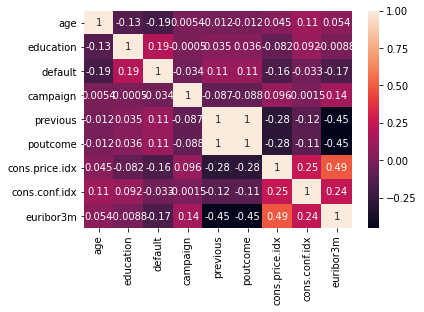

In [53]:
## check correlation -- using spearman method (non-parametric)
# we can see that previous and poutcome is correlated completely -- I will drop one of them
sns.heatmap(bank1.corr(method = 'spearman'), annot = True)

In [54]:
catcol_bank = bank.select_dtypes('object').columns

In [56]:
catcol_bank

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [65]:
corr_cat = []
for i in catcol_bank:
    temp = []
    for j in catcol_bank:
        temp.append(theils_u(bank[i], bank[j]))
    corr_cat.append(temp)    

In [67]:
corr_cat_res = pd.DataFrame(corr_cat, index = catcol_bank, columns = catcol_bank)

Text(0.5, 1.0, 'Correlation among Categorical Features')

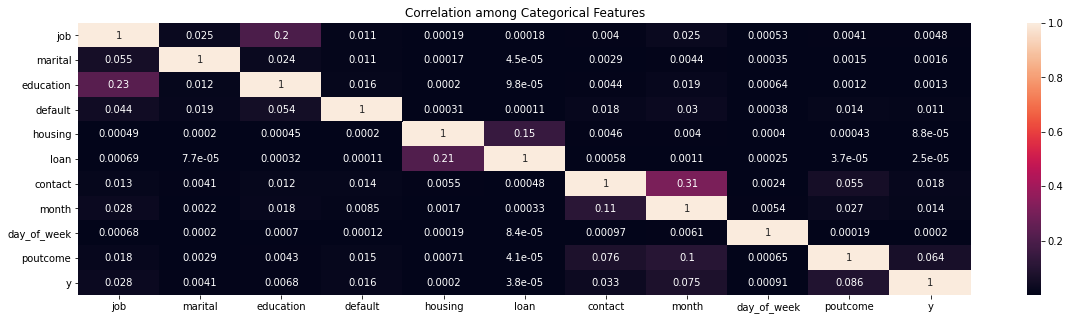

In [68]:
plt.figure(figsize = (20,5))
sns.heatmap(corr_cat_res, annot = True)
plt.title('Correlation among Categorical Features')

> Using Theil's U correlation we can see assymetry correlation among the categorical features. We also see that most of the features are not correlated strongly with each other. 

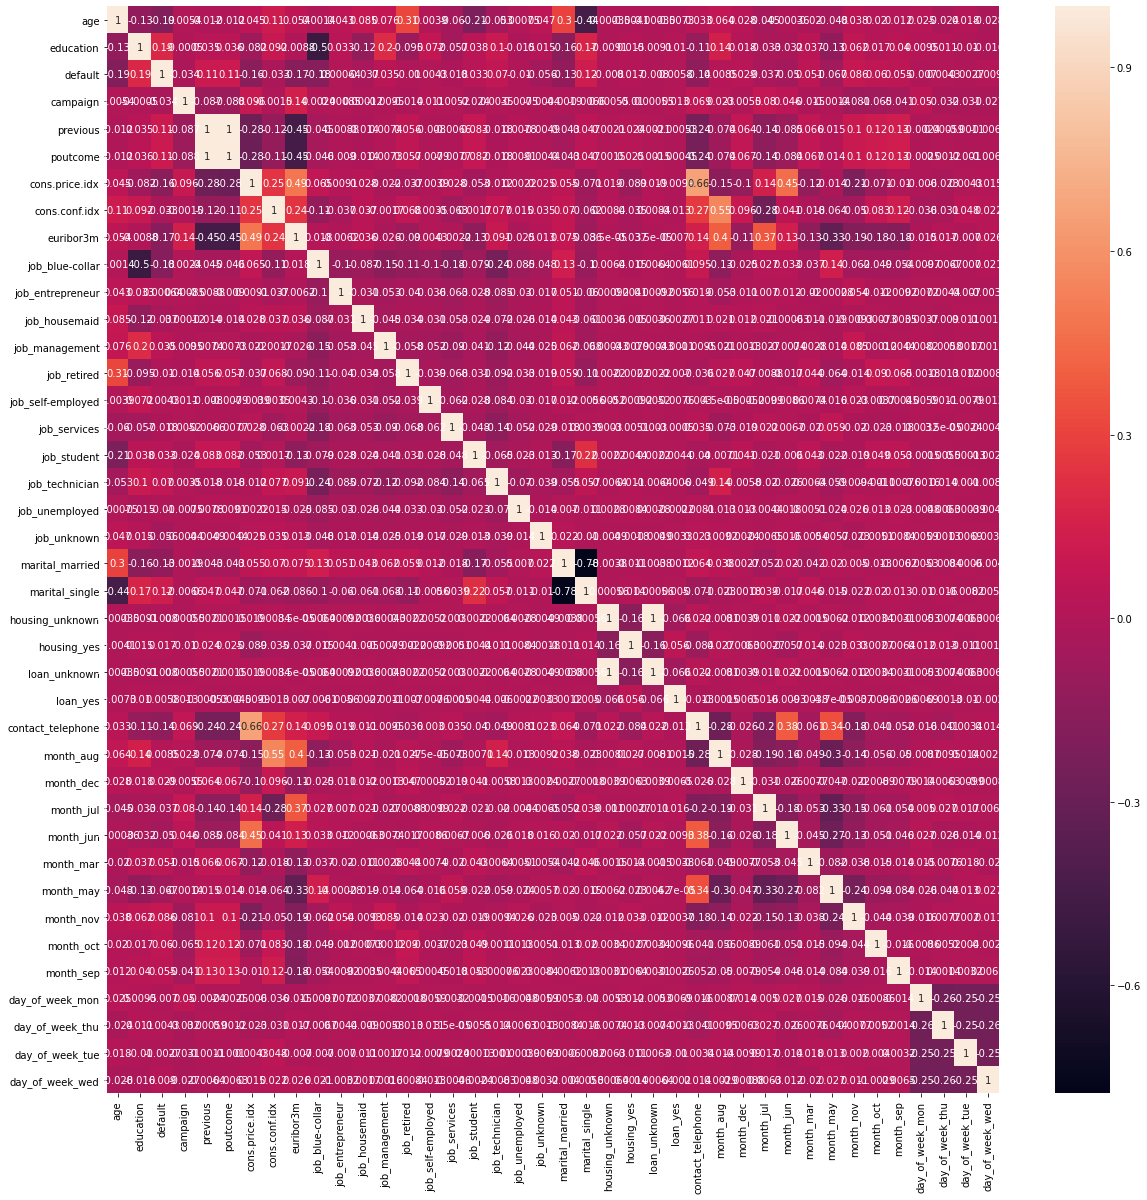

In [70]:
plt.figure(figsize = (20,20))
sns.heatmap(bank_dum.corr(method = 'spearman'), annot = True)

> This heatmap is really complex, but we can see that two pairs of features are correlated completely (the value is 1) -- which are poutcome with previous, and housing_unknown with loan_unknown. Therefore we will drop one in each pair.

In [71]:
## dropping loan_unknown and previous

bank_dum.drop(['previous', 'loan_unknown'], axis = 1, inplace = True)

In [72]:
bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 38 columns):
age                  41087 non-null int64
education            41087 non-null int64
default              41087 non-null int64
campaign             41087 non-null int64
poutcome             41087 non-null int64
cons.price.idx       41087 non-null float64
cons.conf.idx        41087 non-null float64
euribor3m            41087 non-null float64
job_blue-collar      41087 non-null uint8
job_entrepreneur     41087 non-null uint8
job_housemaid        41087 non-null uint8
job_management       41087 non-null uint8
job_retired          41087 non-null uint8
job_self-employed    41087 non-null uint8
job_services         41087 non-null uint8
job_student          41087 non-null uint8
job_technician       41087 non-null uint8
job_unemployed       41087 non-null uint8
job_unknown          41087 non-null uint8
marital_married      41087 non-null uint8
marital_single       41087 non-null uint8
hou

In [77]:
cols = bank_ht.columns

In [75]:
bank_ht = pd.concat([bank_dum,target], axis = 1)

In [76]:
bank_ht.head()

,age,education,default,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,housing_unknown,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
0,56,0,1,1,0,93.994,-36.4,4.857,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,no
1,57,3,0,1,0,93.994,-36.4,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,no
2,37,3,1,1,0,93.994,-36.4,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,no
3,40,1,1,1,0,93.994,-36.4,4.857,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,no
4,56,3,1,1,0,93.994,-36.4,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,no


In [78]:
# We did this already in the EDA, but it's nice to put it here again
# Numerical columns

from scipy.stats import mannwhitneyu
mann = []
for i in cols:
    if mannwhitneyu(bank_ht[bank_ht['y'] == 'yes'][i], 
                    bank_ht[bank_ht['y'] == 'no'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [cols, mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,age,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,default,Reject Null Hypothesis
3,campaign,Reject Null Hypothesis
4,poutcome,Reject Null Hypothesis
5,cons.price.idx,Reject Null Hypothesis
6,cons.conf.idx,Reject Null Hypothesis
7,euribor3m,Reject Null Hypothesis
8,job_blue-collar,Reject Null Hypothesis
9,job_entrepreneur,Reject Null Hypothesis


Several of the dummy features are not significant to the target y, but we will not drop them for now. I will decide whether or not to drop them using the feature importance later in our modelling steps.

In [79]:
bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 38 columns):
age                  41087 non-null int64
education            41087 non-null int64
default              41087 non-null int64
campaign             41087 non-null int64
poutcome             41087 non-null int64
cons.price.idx       41087 non-null float64
cons.conf.idx        41087 non-null float64
euribor3m            41087 non-null float64
job_blue-collar      41087 non-null uint8
job_entrepreneur     41087 non-null uint8
job_housemaid        41087 non-null uint8
job_management       41087 non-null uint8
job_retired          41087 non-null uint8
job_self-employed    41087 non-null uint8
job_services         41087 non-null uint8
job_student          41087 non-null uint8
job_technician       41087 non-null uint8
job_unemployed       41087 non-null uint8
job_unknown          41087 non-null uint8
marital_married      41087 non-null uint8
marital_single       41087 non-null uint8
hou

In [80]:
len(target)

41087

In [143]:
target2 = target.apply(lambda x : 1 if x == 'yes' else 0)

In [144]:
len(target2)

41087

In [145]:
target2

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41087, dtype: int64

## Modelling Preparation

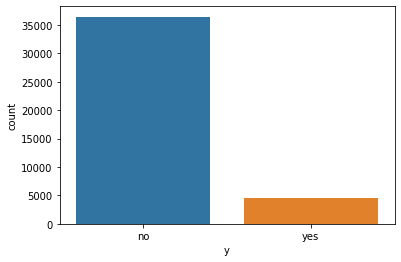

In [140]:
sns.countplot(bank_ht['y'])

In [141]:
bank_ht['y'].value_counts()

no     36463
yes     4624
Name: y, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(bank_dum, target2,
                                                   test_size = 0.3, random_state = 101)

In [147]:
y_train.value_counts()

0    25476
1     3284
Name: y, dtype: int64

In [148]:
y_test.value_counts()

0    10987
1     1340
Name: y, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef

> Instead of using resampling method (also SMOTE, which is not really good for categorical features)
let's use the hyperparameter that is already included in the model to handle class imbalanced
we know that we have class imbalance, thus directly using class_weight = 'balanced' 
for xgb we will use scale_pos_weight = 7,75 --> from train data (sum(no)/sum(yes))

> Additionally, if we do not set the max_depth for RFC, it will definitely overfit.
I am using max_depth = 6 in here, because that is the default for XGB -- so I will put them in the 'similar condition'

> For logistic regression I use solver saga because the dataset is quite big, and if I set max_iter to be less than 1000, it will fail to converge

In [184]:
log_reg = LogisticRegression(solver = 'saga', max_iter = 1000, class_weight = 'balanced')
rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 6)
xgb = XGBClassifier(scale_pos_weight = 7.75)

In [85]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

> We need to choose the right metrics to evaluate our model later. In a class imbalance case, accuracy might not be the best one -- we want to predict the True case accurately. Since our dataset has over 80% of Target No, I am afraid that our model will prefer to predict No instead of Yes. Therefore, I think we need to pick precision and recall, to make sure that our model correctly predicting the Target Yes. 

* A higher score in recall for Target Yes is more desired for aggresive type of bank, because it indicates a lower False Negative (cases which are actually positive, but predicted negative). Since we have much smaller case of Target Yes, finding the true Target Yes is important, because it means we get the customer who will buy the product or in this case putting the deposit in the bank (customer acquisition). If we have a high False Negative, means we missed our customer and bank can probably lost revenue.

* A higher score in precision is also desired (more for the conservative bank type), but it can be tolerated if we have lower precision score than recall score. Low precision score indicates a higher number of False Positive (cases which are actually negative, but predicted positive). Although pursuing False Positive customers can also cost resources and time, but still getting new True customers is more important for bank.

* For now, let's say that we want to maximize the customer acquisition. I will show the metrics, but my objection will be more to maximize the f1 score (balance between precision and recall), and if I have to choose further, I will choose the one with bigger recall score.

## Logistic regression

In [152]:
X_trainscale = scaler.fit_transform(X_train)

In [153]:
log_reg.fit(X_trainscale, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
pred_train = log_reg.predict(X_trainscale)

In [155]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88     25476
           1       0.32      0.63      0.43      3284

    accuracy                           0.81     28760
   macro avg       0.63      0.73      0.66     28760
weighted avg       0.87      0.81      0.83     28760



In [156]:
print(confusion_matrix(y_train, pred_train))

[[21124  4352]
 [ 1205  2079]]


In [157]:
X_testscale = scaler.transform(X_test)

In [158]:
predictions = log_reg.predict(X_testscale)

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10987
           1       0.32      0.63      0.42      1340

    accuracy                           0.81     12327
   macro avg       0.63      0.73      0.66     12327
weighted avg       0.88      0.81      0.84     12327



In [160]:
print(confusion_matrix(y_test, predictions))

[[9184 1803]
 [ 497  843]]


Here we can see that across all actual true cases, logistic model can predict around 63% True Positive, whereas across all predicted true cases, only around 32% were correct predictions. The F1, recall and precisions scores are consistent. 

## Random Forest Classifier

In [185]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
rfc_train = rfc.predict(X_train)

In [187]:
print(confusion_matrix(y_train,rfc_train))

[[21897  3579]
 [ 1207  2077]]


In [188]:
print(classification_report(y_train,rfc_train))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     25476
           1       0.37      0.63      0.46      3284

    accuracy                           0.83     28760
   macro avg       0.66      0.75      0.68     28760
weighted avg       0.88      0.83      0.85     28760



In [189]:
rfc_prediction = rfc.predict(X_test)

In [190]:
print(confusion_matrix(y_test,rfc_prediction))

[[9486 1501]
 [ 498  842]]


In [191]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     10987
           1       0.36      0.63      0.46      1340

    accuracy                           0.84     12327
   macro avg       0.65      0.75      0.68     12327
weighted avg       0.89      0.84      0.86     12327



The number of True Positives here is similar with the one generated from logistic regression model. However, the number of the False positives are 300 less than logreg model. Therefore for now we can say that this model better than logreg. All scores in RFC model also appeared to be better than logreg.

## XGBClassifier

In [168]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=7.75, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [169]:
xgb_train = xgb.predict(X_train)

In [170]:
print(confusion_matrix(y_train, xgb_train))

[[22871  2605]
 [  635  2649]]


In [171]:
print(classification_report(y_train, xgb_train))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     25476
           1       0.50      0.81      0.62      3284

    accuracy                           0.89     28760
   macro avg       0.74      0.85      0.78     28760
weighted avg       0.92      0.89      0.90     28760



In [172]:
xgb_pred = xgb.predict(X_test)

In [173]:
print(confusion_matrix(y_test, xgb_pred))

[[9590 1397]
 [ 580  760]]


In [174]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     10987
           1       0.35      0.57      0.43      1340

    accuracy                           0.84     12327
   macro avg       0.65      0.72      0.67     12327
weighted avg       0.88      0.84      0.86     12327



Here we see that XGB model is overfitting -- having a better train scores compared to the test scores. However, the test scores are quite similar with the test scores from other models. Looking at the confusion matrix of the test set, the True Positive numbers predicted by xgb model are the smallest compared to other models -- although the False Positives are the smallest as well. 

## Cross Validation -- without tuning the hyperparameter 
To see whether our models are only 'lucky' to get such scores

In [128]:
len(target2)

41087

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [175]:
# Making metrics functions first

def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confmatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confmatrix,
        'logloss': logloss
    }
  
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confmatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confmatrix,
        'logloss': logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

### Logistic Regression

In [176]:
# For Logistic Regression

k = 5
kf_log = KFold(n_splits = k, shuffle = True, random_state = 101)

In [178]:
train_errors = []
valid_errors = []

for train_index, val_index in kf_log.split(bank_dum,target2):
    
    #split data
    X_tr, X_val = bank_dum.iloc[train_index], bank_dum.iloc[val_index]
    y_tr, y_val = target2.iloc[train_index], target2.iloc[val_index]
    
    #instantiate model -- taking the one with the best hyperparameter according to the randomsearch
    log_reg = LogisticRegression(solver = 'saga', max_iter = 1000, class_weight = 'balanced')

    #Scaling our X_train_log and X_val_log
    X_tr_scale = scaler.fit_transform(X_tr)
    X_val_scale = scaler.transform(X_val)


    #calculate error
    train_error, valid_error = calc_metrics(X_tr_scale, y_tr, X_val_scale, y_val, log_reg)
    
    #append to appropriate list
    train_errors.append(train_error)
    valid_errors.append(valid_error)

In [179]:
matrix  = []
for i, j in zip(train_errors, valid_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'], i['f1'], j['f1'], 
                   i['matthew'], j['matthew'], i['logloss'], j['logloss']])

calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.808300,0.815405,0.785738,0.797165,0.425982,0.434166,0.350619,0.367412,0.537407,0.534353
2 Iteration,0.809151,0.806036,0.792600,0.767820,0.434100,0.391603,0.360160,0.317821,0.530575,0.534163
3 Iteration,0.809948,0.804917,0.786682,0.784039,0.426091,0.433769,0.353759,0.356275,0.533590,0.538228
4 Iteration,0.805233,0.801996,0.788265,0.785446,0.422827,0.428521,0.350382,0.351865,0.535452,0.532980
5 Iteration,0.813264,0.814287,0.787587,0.788143,0.427425,0.441843,0.353587,0.367740,0.534280,0.537956
Average,0.809179,0.808528,0.788175,0.784523,0.427285,0.425981,0.353701,0.352223,0.534261,0.535536


### Random Forest Classifier

In [134]:
# For rfc

k = 5
kf_rfc = KFold(n_splits = k, shuffle = True, random_state = 101)

In [192]:
train_errors = []
valid_errors = []

for train_index, val_index in kf_rfc.split(bank_dum,target2):
    
    #split data
    X_tr, X_val = bank_dum.iloc[train_index], bank_dum.iloc[val_index]
    y_tr, y_val = target2.iloc[train_index], target2.iloc[val_index]
    
    #instantiate model -- taking the one with the best hyperparameter according to the randomsearch
    rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 6)

    #calculate error
    train_error, valid_error = calc_metrics(X_tr, y_tr, X_val, y_val, rfc)
    
    #append to appropriate list
    train_errors.append(train_error)
    valid_errors.append(valid_error)

In [193]:
matrix  = []
for i, j in zip(train_errors, valid_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'], i['f1'], j['f1'], 
                   i['matthew'], j['matthew'], i['logloss'], j['logloss']])

calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.830661,0.832319,0.804153,0.801629,0.462118,0.459608,0.392237,0.395600,0.521512,0.522653
2 Iteration,0.828410,0.829642,0.808377,0.781606,0.465403,0.427637,0.396241,0.358893,0.515595,0.519828
3 Iteration,0.824034,0.822198,0.805848,0.797787,0.451338,0.462670,0.383407,0.390248,0.517032,0.523260
4 Iteration,0.825768,0.822320,0.805269,0.794424,0.454519,0.459660,0.386618,0.387899,0.518954,0.521627
5 Iteration,0.835899,0.831447,0.804630,0.798180,0.463924,0.464217,0.395166,0.392293,0.517835,0.523104
Average,0.828954,0.827585,0.805655,0.794725,0.459460,0.454758,0.390734,0.384987,0.518186,0.522094


### XGBClassifier

In [137]:
# For xgb

k = 5
kf_xgb = KFold(n_splits = k, shuffle = True, random_state = 101)

In [182]:
train_errors = []
valid_errors = []

for train_index, val_index in kf_xgb.split(bank_dum,target2):
    
    #split data
    X_tr, X_val = bank_dum.iloc[train_index], bank_dum.iloc[val_index]
    y_tr, y_val = target2.iloc[train_index], target2.iloc[val_index]
    
    #instantiate model -- taking the one with the best hyperparameter according to the randomsearch
    xgb = XGBClassifier(scale_pos_weight = 7.75)

    #calculate error
    train_error, valid_error = calc_metrics(X_tr, y_tr, X_val, y_val, xgb)
    
    #append to appropriate list
    train_errors.append(train_error)
    valid_errors.append(valid_error)

In [183]:
matrix  = []
for i, j in zip(train_errors, valid_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'], i['f1'], j['f1'], 
                   i['matthew'], j['matthew'], i['logloss'], j['logloss']])

calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.883842,0.838404,0.932651,0.785547,0.605986,0.448047,0.562509,0.377899,0.357125,0.446661
2 Iteration,0.880343,0.843393,0.932255,0.768930,0.602607,0.429268,0.559260,0.357333,0.356393,0.443024
3 Iteration,0.888166,0.835706,0.933268,0.773504,0.611909,0.451220,0.570642,0.371775,0.349886,0.444294
4 Iteration,0.882324,0.837654,0.928998,0.785059,0.595651,0.465545,0.551624,0.390970,0.358035,0.445326
5 Iteration,0.881807,0.838384,0.933531,0.783714,0.600760,0.458843,0.559191,0.383407,0.352460,0.443901
Average,0.883296,0.838708,0.932140,0.779351,0.603383,0.450584,0.560645,0.376277,0.354780,0.444641


> Based on the cross validation (KFold with k =  5), we can see that the models are quite stable. The scores are not fluctuating extremely, both the training and test scores. It can be seen that XGB is the only overfitting model. If we see the test scores at all metrics, all models performed similarly.

> In the next section, I will do the hyperparameter tuning for these three models

In [194]:
## exporting dataset to be used later
bank_dum.to_csv('bank_dummies.csv', index = False)

In [195]:
bank_ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 39 columns):
age                  41087 non-null int64
education            41087 non-null int64
default              41087 non-null int64
campaign             41087 non-null int64
poutcome             41087 non-null int64
cons.price.idx       41087 non-null float64
cons.conf.idx        41087 non-null float64
euribor3m            41087 non-null float64
job_blue-collar      41087 non-null uint8
job_entrepreneur     41087 non-null uint8
job_housemaid        41087 non-null uint8
job_management       41087 non-null uint8
job_retired          41087 non-null uint8
job_self-employed    41087 non-null uint8
job_services         41087 non-null uint8
job_student          41087 non-null uint8
job_technician       41087 non-null uint8
job_unemployed       41087 non-null uint8
job_unknown          41087 non-null uint8
marital_married      41087 non-null uint8
marital_single       41087 non-null uint8
hou

In [196]:
bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41087 entries, 0 to 41187
Data columns (total 38 columns):
age                  41087 non-null int64
education            41087 non-null int64
default              41087 non-null int64
campaign             41087 non-null int64
poutcome             41087 non-null int64
cons.price.idx       41087 non-null float64
cons.conf.idx        41087 non-null float64
euribor3m            41087 non-null float64
job_blue-collar      41087 non-null uint8
job_entrepreneur     41087 non-null uint8
job_housemaid        41087 non-null uint8
job_management       41087 non-null uint8
job_retired          41087 non-null uint8
job_self-employed    41087 non-null uint8
job_services         41087 non-null uint8
job_student          41087 non-null uint8
job_technician       41087 non-null uint8
job_unemployed       41087 non-null uint8
job_unknown          41087 non-null uint8
marital_married      41087 non-null uint8
marital_single       41087 non-null uint8
hou

In [197]:
bank_ht.to_csv('bank_ht.csv', index = False)